In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

In [6]:
cleaned_data = pd.read_csv("cleaned_data.csv")
label_encoder = LabelEncoder()
cleaned_data['Delayed'] = label_encoder.fit_transform(cleaned_data['Delayed'])

# Define features (X) and target (y)
X = cleaned_data.drop(['Delayed'], axis=1).select_dtypes(include=['number'])
y = cleaned_data['Delayed']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     60945
           1       1.00      1.00      1.00     40088

    accuracy                           1.00    101033
   macro avg       1.00      1.00      1.00    101033
weighted avg       1.00      1.00      1.00    101033



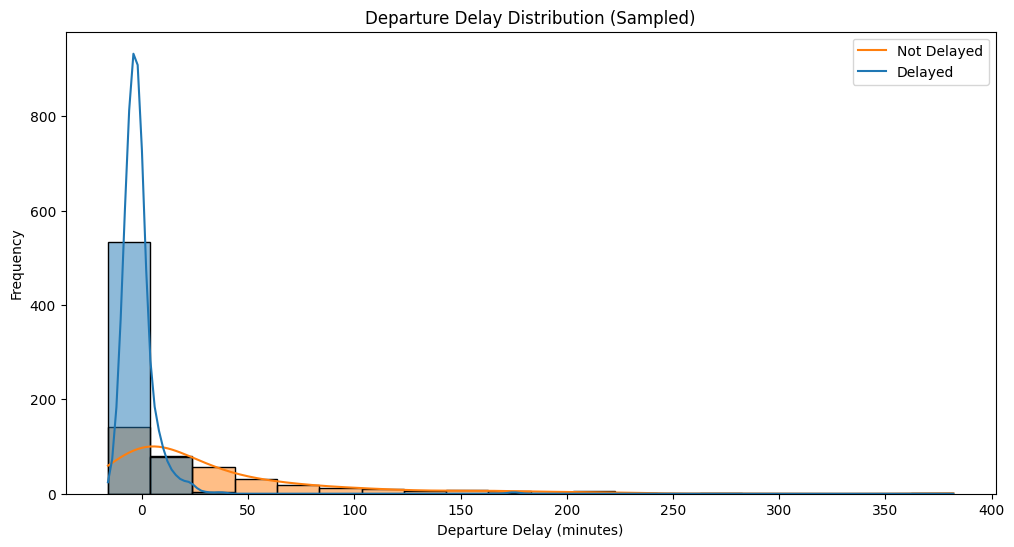

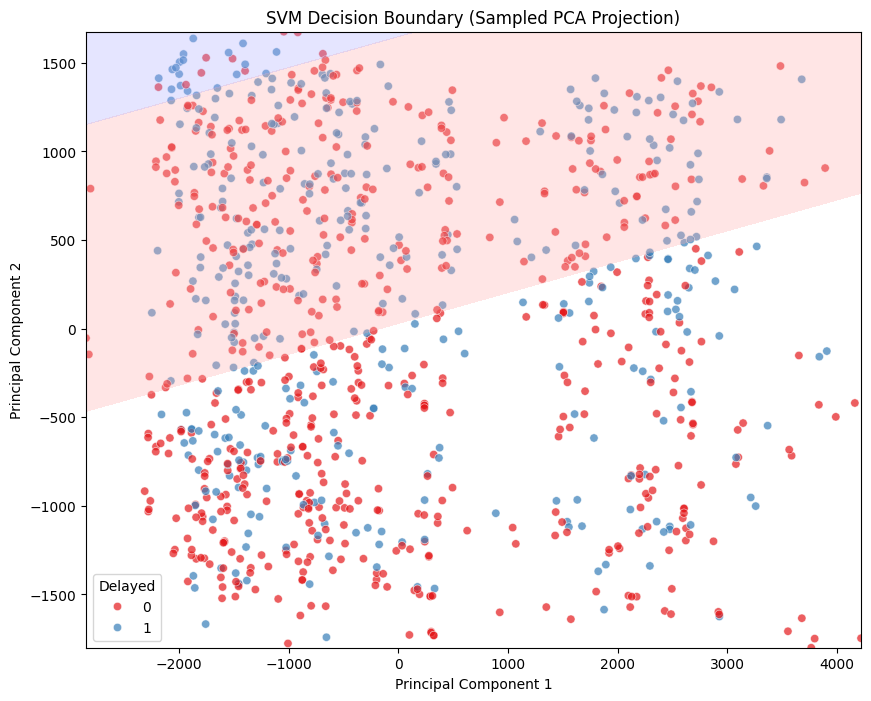

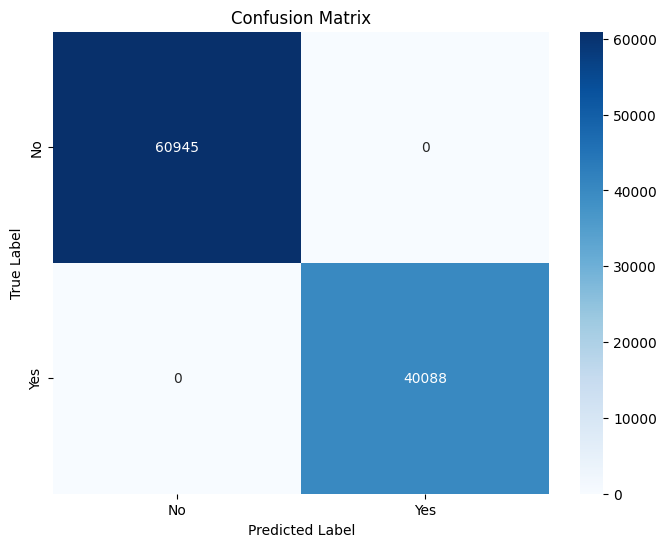

In [7]:
# 1. Data Distribution:
sample_data = cleaned_data.sample(n=1000, random_state=42)
plt.figure(figsize=(12, 6))
sns.histplot(data=sample_data, x='dep_delay', hue='Delayed', kde=True, bins=20)
plt.title('Departure Delay Distribution (Sampled)')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.legend(['Not Delayed', 'Delayed'])
plt.show()

# 2. PCA Projection and Decision Boundary: Use a subset
pca = PCA(n_components=2)
X_sample = X.sample(n=1000, random_state=42)  # Reduce data size
y_sample = y.loc[X_sample.index]
X_sample_pca = pca.fit_transform(X_sample)

svm_model_pca = SVC(kernel='linear', random_state=42)
svm_model_pca.fit(X_sample_pca, y_sample)

# Decision boundary
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_sample_pca[:, 0], y=X_sample_pca[:, 1], hue=y_sample, palette='Set1', alpha=0.7)
plt.title("SVM Decision Boundary (Sampled PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

xx, yy = np.meshgrid(np.linspace(X_sample_pca[:, 0].min(), X_sample_pca[:, 0].max(), 50),
                     np.linspace(X_sample_pca[:, 1].min(), X_sample_pca[:, 1].max(), 50))
Z = svm_model_pca.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, colors=['#FFAAAA', '#AAAAFF', '#AAFFAA'])
plt.legend(title='Delayed')
plt.show()

# 3. Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()